In [ ]:
pip install tensorflow

[*********************100%%**********************]  1 of 1 completed
Epoch 1/25
85/85 [==============================] - 13s 86ms/step - loss: 0.0070 - accuracy: 7.3855e-04
Epoch 2/25
85/85 [==============================] - 6s 70ms/step - loss: 7.4344e-04 - accuracy: 7.3855e-04
Epoch 3/25
85/85 [==============================] - 7s 86ms/step - loss: 6.0527e-04 - accuracy: 7.3855e-04
Epoch 4/25
85/85 [==============================] - 6s 70ms/step - loss: 6.1191e-04 - accuracy: 7.3855e-04
Epoch 5/25
85/85 [==============================] - 8s 97ms/step - loss: 6.4565e-04 - accuracy: 7.3855e-04
Epoch 6/25
85/85 [==============================] - 7s 86ms/step - loss: 5.1423e-04 - accuracy: 7.3855e-04
Epoch 7/25
85/85 [==============================] - 7s 87ms/step - loss: 4.7942e-04 - accuracy: 7.3855e-04
Epoch 8/25
85/85 [==============================] - 6s 72ms/step - loss: 3.9029e-04 - accuracy: 7.3855e-04
Epoch 9/25
85/85 [==============================] - 7s 88ms/step - loss: 4.748

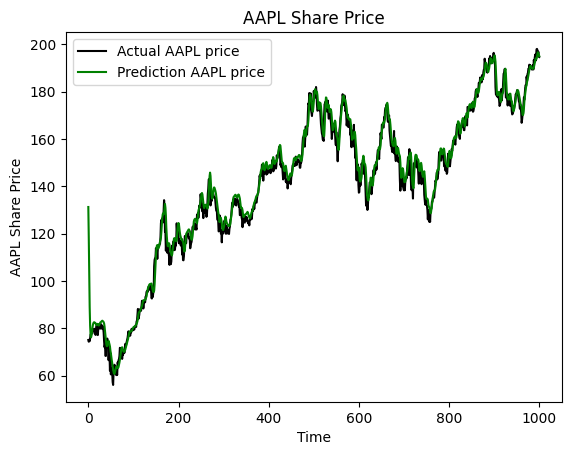

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

company = "AAPL"

start = dt.datetime(2012,1,1)
end = dt.datetime(2023,1,1)
data = yf.download(company, start= start, end=end)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0,2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0,2))
model.add(LSTM(units=50))
model.add(Dropout(0,2))
model.add(Dense(units=1)

model.compile(optimizer = 'adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=25, batch_size = 32)


''' Testing the Model Accuracy on Existing Data '''

test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = yf.download(company,
                        start = test_start,
                        end = test_end)
actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'],
                           test_data['Close']), axis = 0)

model_inputs = total_dataset[len(total_dataset)
                              - len(test_data)
                              - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

# Making predictions on test Data

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

# Plotting the Test Predictions

plt.plot(actual_prices, color="black",
         label = f"Actual {company} price")
plt.plot(predicted_price, color="green",
         label= f"Prediction {company} price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()